### Imports

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd

In [2]:
import seaborn as sns
%matplotlib inline 
import matplotlib.pyplot as plt

In [3]:
from sklearn.preprocessing import Normalizer

In [4]:
pd.options.display.max_rows = 4000
pd.options.display.max_columns = 4000

In [5]:
gov_arch_csv = 'data/communities_data_prepped.csv'

In [6]:
gov_df = pd.read_csv(gov_arch_csv)

In [7]:
gov_df.head()

,Name,Institutions,Mechanism,Culture/Values/Norms,Notes,Time span,Geography,Size,Source,Metanotes,Heterogeneity,FC comments,expert check,mechanisms_include_dreaming,mechanisms_include_dual-sex_political_system,mechanisms_include_negotiation,mechanisms_include_secret_ballot,mechanisms_include_president_consul_chief_executive,mechanisms_include_induction_rite_ceremony,mechanisms_include_divine_right,mechanisms_include_council_local,mechanisms_include_rule_of_law,mechanisms_include_election,mechanisms_include_self-help,mechanisms_include_litigation,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_arbitration,mechanisms_include_co-optation,mechanisms_include_balance_of_power,mechanisms_include_monitoring,mechanisms_include_blood_relations,mechanisms_include_military_force,mechanisms_include_judicial_review,mechanisms_include_supermajority,mechanisms_include_petition,mechanisms_include_constitution,mechanisms_include_voting,mechanisms_include_power_fluidity,mechanisms_include_matrilineality,mechanisms_include_bureaucracy,mechanisms_include_jury_judge,mechanisms_include_leader_first_among_equals,mechanisms_include_open_political_unit,mechanisms_include_fines,mechanisms_include_handshake,mechanisms_include_assembly_central,mechanisms_include_reputational_risk,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_turnover_rotation,mechanisms_include_lottery_random_selection,mechanisms_include_consensus,mechanisms_include_meritocracy,mechanisms_include_matriarchy,mechanisms_include_kingchief-as-figurehead,mechanisms_include_exit,mechanisms_include_gerontocracy,mechanisms_include_alliance,mechanisms_include_board_committee,mechanisms_include_quorum,mechanisms_include_civil_disobedience,mechanisms_include_assembly_local,mechanisms_include_criticism_mocking_joking,mechanisms_include_coalition,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_delegation,mechanisms_include_majority_voting,mechanisms_include_confederacy,mechanisms_include_enfranchisement,mechanisms_include_plurality_voting,mechanisms_include_forced_labour,mechanisms_include_heredity,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_consent,mechanisms_include_magistrate_official,mechanisms_include_seizing_of_property,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_scrutiny_of_officials,mechanisms_include_agenda_setting,mechanisms_include_consultation,mechanisms_include_tribunal_court_,mechanisms_include_autocratic_leader_unbound,mechanisms_include_screening_process,mechanisms_include_ratification_acclamation_only,mechanisms_include_mandate,mechanisms_include_public_meetings,mechanisms_include_mediation,mechanisms_include_council_central_,mechanisms_include_oath,mechanisms_include_police,mechanisms_include_assembly_elite,mechanisms_include_appeal,mechanisms_include_payment_for_occupying_office,mechanisms_include_life_appointment,mechanisms_include_property_requirement,mechanisms_include_veto,mechanisms_include_lobbying,mechanisms_include_capital_punishment,mechanisms_include_deliberation,mechanisms_include_graduated_sanctions,mechanisms_include_group_voting,mechanisms_include_remunerated_position,mechanisms_include_representation,mechanisms_include_destruction_of_property,mechanisms_include_unanimity,mechanisms_include_vote_by_show_of_hands,mechanisms_include_popularity_,mechanisms_include_word_of_mouth,mechanisms_include_paying_damages_compensation,mechanisms_include_patronage_for_office,mechanisms_include_frequent_and_or_regular_meetings,values_include_nationalism,values_include_diversity,values_include_supernatural,values_include_obedience_to_authority,values_include_competition,values_include_cooperation,values_include_unwritten_rules,values_include_discrimination,values_include_gender_equality,values_include_culture_of_war,values_include_egalitarianism,values_include_to_approve_respect,

In [8]:
gov_df.dtypes

Name                                                                   object
Institutions                                                           object
Mechanism                                                              object
Culture/Values/Norms                                                   object
Notes                                                                  object
Time span                                                              object
Geography                                                              object
Size                                                                   object
Source                                                                 object
Metanotes                                                              object
Heterogeneity                                                          object
FC comments                                                            object
expert check                                                    

## Correlation Matrix

In [9]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    
    plt.xticks(rotation=70)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);

In [10]:
data_plot = gov_df.select_dtypes(include=[np.number]).fillna(0)

In [11]:
list(data_plot)

['mechanisms_include_dreaming',
 'mechanisms_include_dual-sex_political_system',
 'mechanisms_include_negotiation',
 'mechanisms_include_secret_ballot',
 'mechanisms_include_president_consul_chief_executive',
 'mechanisms_include_induction_rite_ceremony',
 'mechanisms_include_divine_right',
 'mechanisms_include_council_local',
 'mechanisms_include_rule_of_law',
 'mechanisms_include_election',
 'mechanisms_include_self-help',
 'mechanisms_include_litigation',
 'mechanisms_include_age_boundaries',
 'mechanisms_include_vote_by_proxy',
 'mechanisms_include_arbitration',
 'mechanisms_include_co-optation',
 'mechanisms_include_balance_of_power',
 'mechanisms_include_monitoring',
 'mechanisms_include_blood_relations',
 'mechanisms_include_military_force',
 'mechanisms_include_judicial_review',
 'mechanisms_include_supermajority',
 'mechanisms_include_petition',
 'mechanisms_include_constitution',
 'mechanisms_include_voting',
 'mechanisms_include_power_fluidity',
 'mechanisms_include_matrilin

In [ ]:
normalized = Normalizer().fit_transform(data_plot)

norm_df = pd.DataFrame(normalized)
norm_df.columns = data_plot.columns
norm_corr = norm_df.corr()

norm_corr

In [ ]:
plot_corr(norm_df)
# Yellow: Positive correlation
# Blue: Negative correlation

## Descriptive analysis

In [14]:
# sns.pairplot(gov_df)

# TODO
- corr matrix for just mech x mech. val x val. mech x val 
- basic histograms of dataset -- descriptions of what's in the dataset 
  - for each mechanism, for each value 
  - size of each community 

- plot:
    - time span
    - geography

## Histograms

In [50]:
list(gov_df.columns)

['Name',
 'Institutions',
 'Mechanism',
 'Culture/Values/Norms',
 'Notes',
 'Time span',
 'Geography',
 'Size',
 'Source',
 'Metanotes',
 'Heterogeneity ',
 'FC comments',
 'expert check',
 'mechanisms_include_dreaming',
 'mechanisms_include_dual-sex_political_system',
 'mechanisms_include_negotiation',
 'mechanisms_include_secret_ballot',
 'mechanisms_include_president_consul_chief_executive',
 'mechanisms_include_induction_rite_ceremony',
 'mechanisms_include_divine_right',
 'mechanisms_include_council_local',
 'mechanisms_include_rule_of_law',
 'mechanisms_include_election',
 'mechanisms_include_self-help',
 'mechanisms_include_litigation',
 'mechanisms_include_age_boundaries',
 'mechanisms_include_vote_by_proxy',
 'mechanisms_include_arbitration',
 'mechanisms_include_co-optation',
 'mechanisms_include_balance_of_power',
 'mechanisms_include_monitoring',
 'mechanisms_include_blood_relations',
 'mechanisms_include_military_force',
 'mechanisms_include_judicial_review',
 'mechanisms_

In [67]:
mechanisms_list = [x for x in gov_df.columns if x.startswith('mechanisms')]
mechanisms_list

['mechanisms_include_dreaming',
 'mechanisms_include_dual-sex_political_system',
 'mechanisms_include_negotiation',
 'mechanisms_include_secret_ballot',
 'mechanisms_include_president_consul_chief_executive',
 'mechanisms_include_induction_rite_ceremony',
 'mechanisms_include_divine_right',
 'mechanisms_include_council_local',
 'mechanisms_include_rule_of_law',
 'mechanisms_include_election',
 'mechanisms_include_self-help',
 'mechanisms_include_litigation',
 'mechanisms_include_age_boundaries',
 'mechanisms_include_vote_by_proxy',
 'mechanisms_include_arbitration',
 'mechanisms_include_co-optation',
 'mechanisms_include_balance_of_power',
 'mechanisms_include_monitoring',
 'mechanisms_include_blood_relations',
 'mechanisms_include_military_force',
 'mechanisms_include_judicial_review',
 'mechanisms_include_supermajority',
 'mechanisms_include_petition',
 'mechanisms_include_constitution',
 'mechanisms_include_voting',
 'mechanisms_include_power_fluidity',
 'mechanisms_include_matrilin

In [74]:
# mechanisms_df = gov_df[['Name'] + mechanisms_list]
mechanisms_df = gov_df[mechanisms_list]

In [75]:
mechanisms_df

,mechanisms_include_dreaming,mechanisms_include_dual-sex_political_system,mechanisms_include_negotiation,mechanisms_include_secret_ballot,mechanisms_include_president_consul_chief_executive,mechanisms_include_induction_rite_ceremony,mechanisms_include_divine_right,mechanisms_include_council_local,mechanisms_include_rule_of_law,mechanisms_include_election,mechanisms_include_self-help,mechanisms_include_litigation,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_arbitration,mechanisms_include_co-optation,mechanisms_include_balance_of_power,mechanisms_include_monitoring,mechanisms_include_blood_relations,mechanisms_include_military_force,mechanisms_include_judicial_review,mechanisms_include_supermajority,mechanisms_include_petition,mechanisms_include_constitution,mechanisms_include_voting,mechanisms_include_power_fluidity,mechanisms_include_matrilineality,mechanisms_include_bureaucracy,mechanisms_include_jury_judge,mechanisms_include_leader_first_among_equals,mechanisms_include_open_political_unit,mechanisms_include_fines,mechanisms_include_handshake,mechanisms_include_assembly_central,mechanisms_include_reputational_risk,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_turnover_rotation,mechanisms_include_lottery_random_selection,mechanisms_include_consensus,mechanisms_include_meritocracy,mechanisms_include_matriarchy,mechanisms_include_kingchief-as-figurehead,mechanisms_include_exit,mechanisms_include_gerontocracy,mechanisms_include_alliance,mechanisms_include_board_committee,mechanisms_include_quorum,mechanisms_include_civil_disobedience,mechanisms_include_assembly_local,mechanisms_include_criticism_mocking_joking,mechanisms_include_coalition,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_delegation,mechanisms_include_majority_voting,mechanisms_include_confederacy,mechanisms_include_enfranchisement,mechanisms_include_plurality_voting,mechanisms_include_forced_labour,mechanisms_include_heredity,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_consent,mechanisms_include_magistrate_official,mechanisms_include_seizing_of_property,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_scrutiny_of_officials,mechanisms_include_agenda_setting,mechanisms_include_consultation,mechanisms_include_tribunal_court_,mechanisms_include_autocratic_leader_unbound,mechanisms_include_screening_process,mechanisms_include_ratification_acclamation_only,mechanisms_include_mandate,mechanisms_include_public_meetings,mechanisms_include_mediation,mechanisms_include_council_central_,mechanisms_include_oath,mechanisms_include_police,mechanisms_include_assembly_elite,mechanisms_include_appeal,mechanisms_include_payment_for_occupying_office,mechanisms_include_life_appointment,mechanisms_include_property_requirement,mechanisms_include_veto,mechanisms_include_lobbying,mechanisms_include_capital_punishment,mechanisms_include_deliberation,mechanisms_include_graduated_sanctions,mechanisms_include_group_voting,mechanisms_include_remunerated_position,mechanisms_include_representation,mechanisms_include_destruction_of_property,mechanisms_include_unanimity,mechanisms_include_vote_by_show_of_hands,mechanisms_include_popularity_,mechanisms_include_word_of_mouth,mechanisms_include_paying_damages_compensation,mechanisms_include_patronage_for_office,mechanisms_include_frequent_and_or_regular_meetings
0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,1,0,0,

In [85]:
mechanisms_df.sum().sort_values(ascending=False)

mechanisms_include_magistrate_official                                 24
mechanisms_include_heredity                                            23
mechanisms_include_election                                            23
mechanisms_include_meritocracy                                         21
mechanisms_include_deliberation                                        19
mechanisms_include_frequent_and_or_regular_meetings                    17
mechanisms_include_consensus                                           17
mechanisms_include_temporary_position_of_power_term_limits             15
mechanisms_include_tribunal_court_                                     14
mechanisms_include_representation                                      12
mechanisms_include_blood_relations                                     12
mechanisms_include_public_meetings                                     11
mechanisms_include_consultation                                        11
mechanisms_include_gerontocracy       

<Axes: >

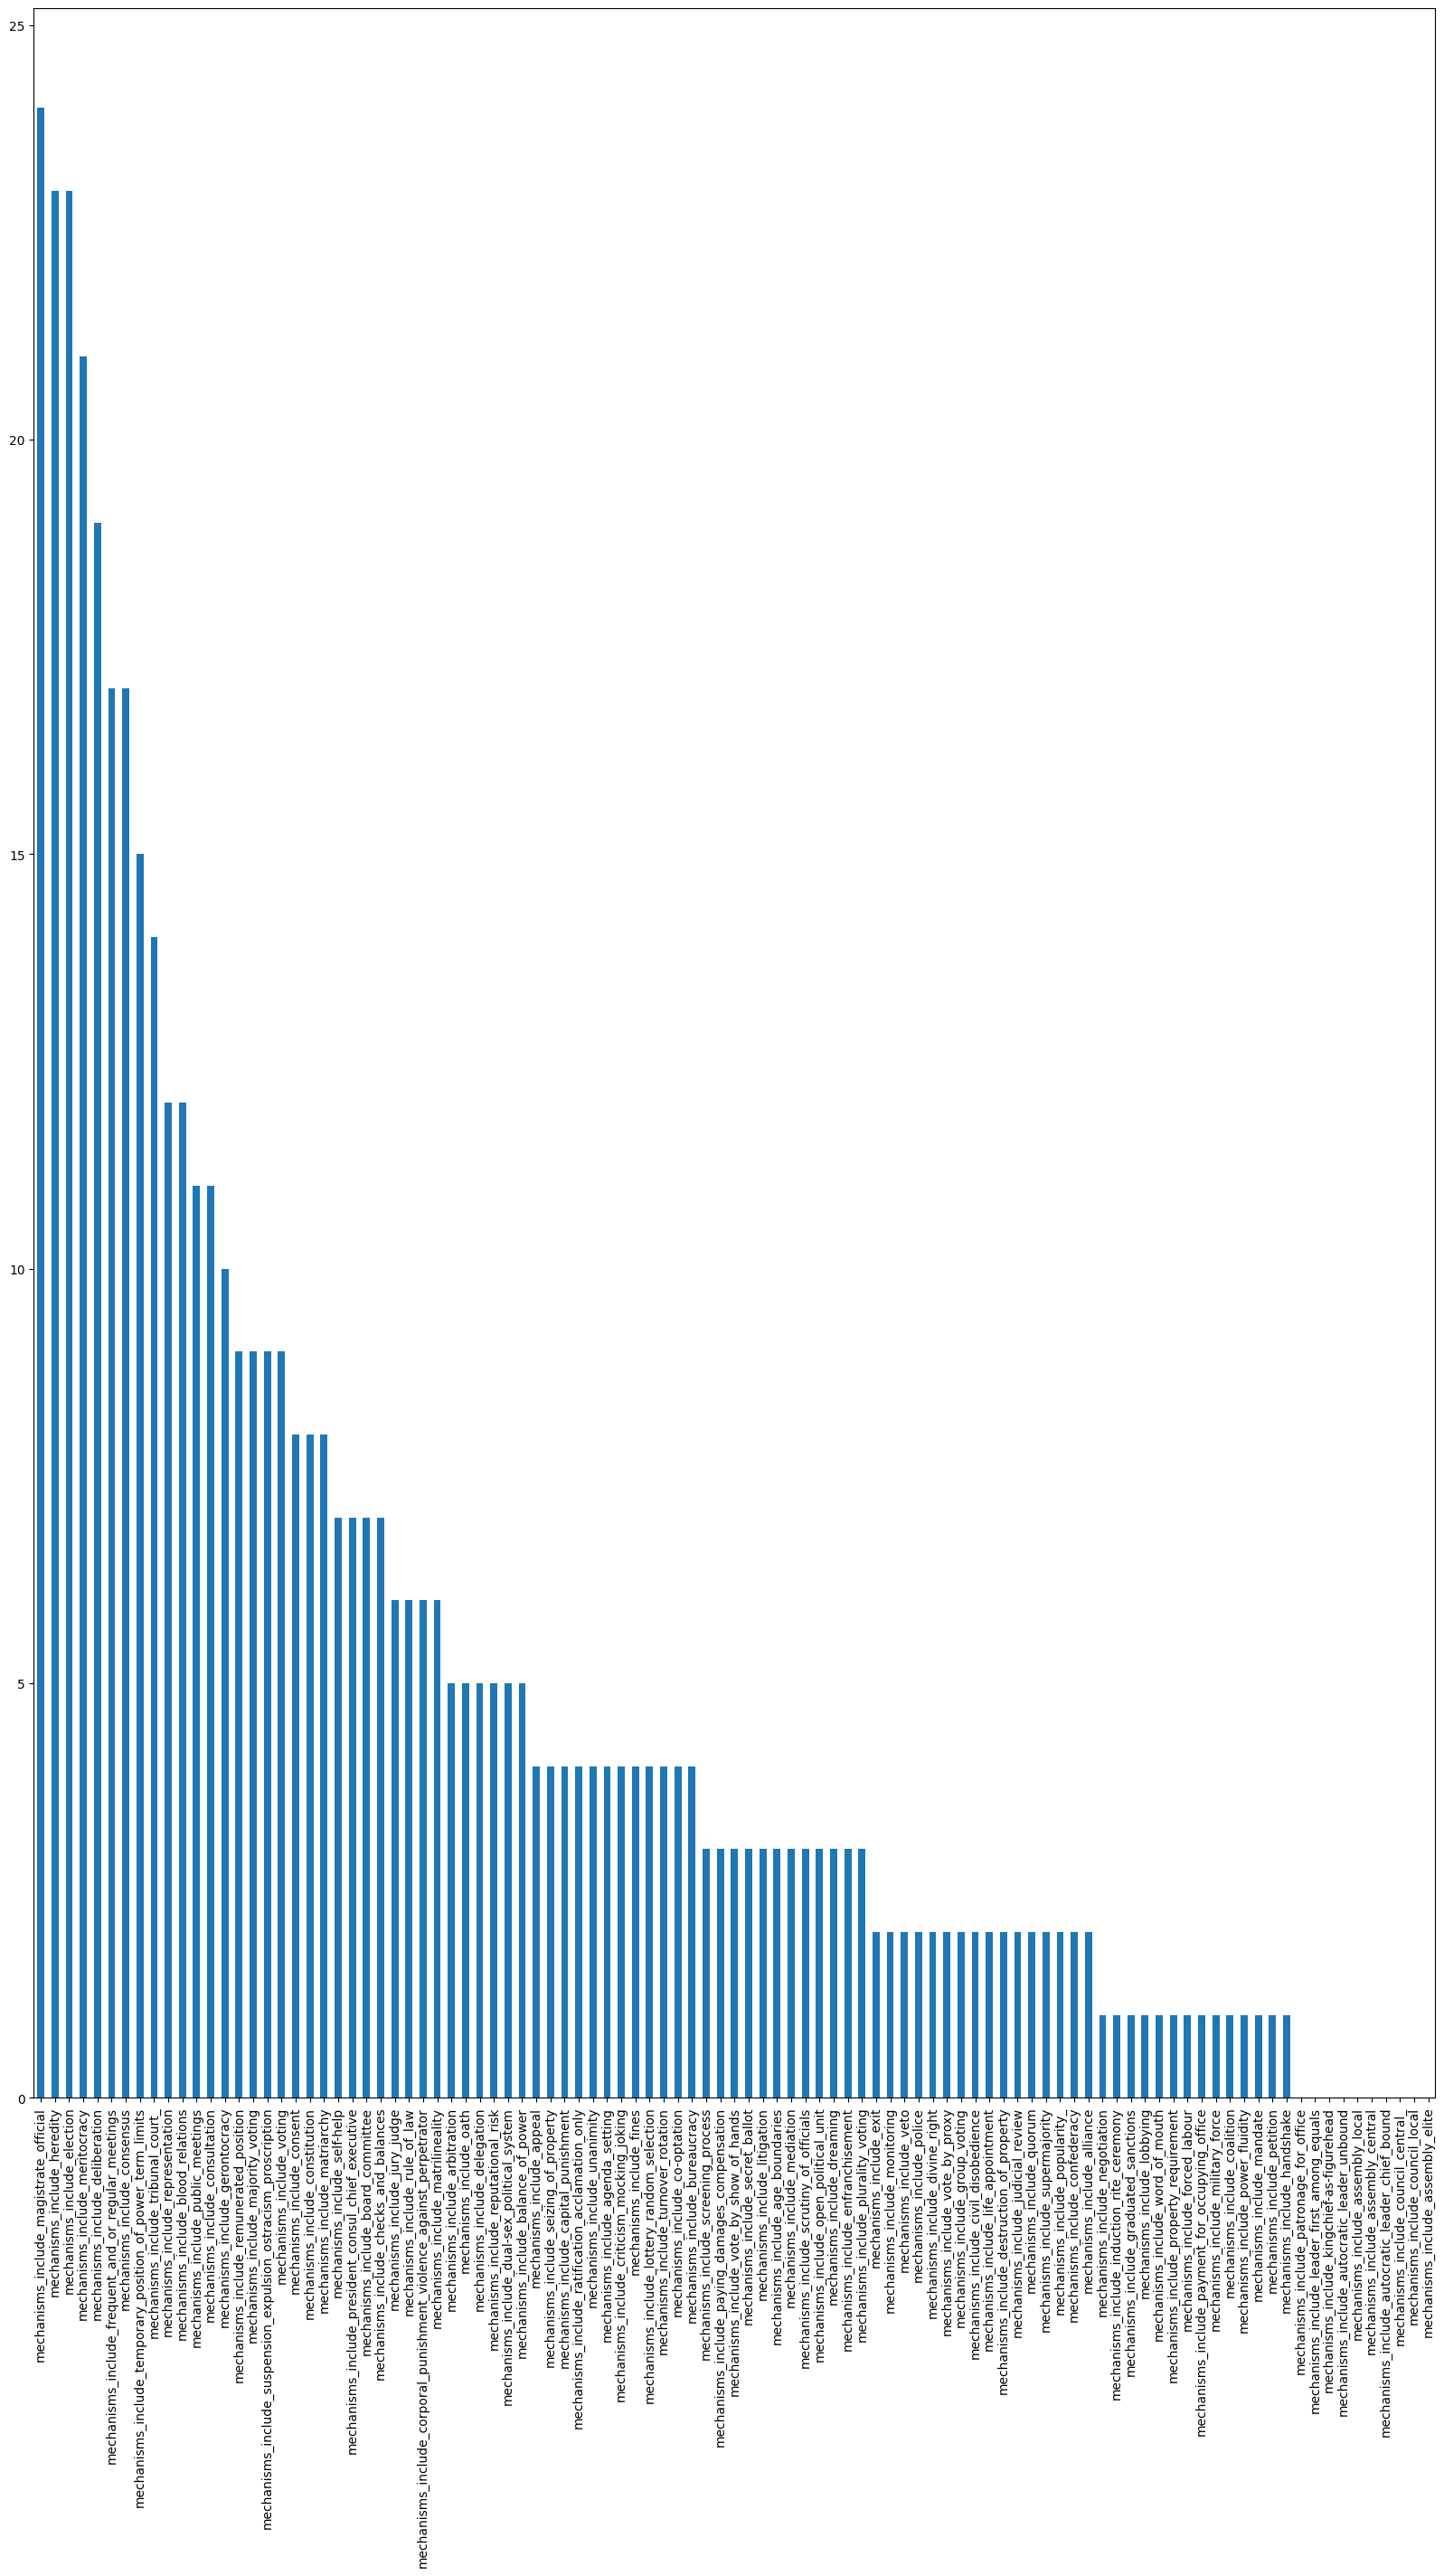

In [94]:
mechanisms_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(20,30))

### Values

In [97]:
values_list = [x for x in gov_df.columns if x.startswith('values')]
values_list

['values_include_nationalism',
 'values_include_diversity',
 'values_include_supernatural',
 'values_include_obedience_to_authority',
 'values_include_competition',
 'values_include_cooperation',
 'values_include_unwritten_rules',
 'values_include_discrimination',
 'values_include_gender_equality',
 'values_include_culture_of_war',
 'values_include_egalitarianism',
 'values_include_to_approve_respect',
 'values_include_generosity',
 'values_include_free_speech',
 'values_include_ritual',
 'values_include_loyalty_patriotism',
 'values_include_greediness',
 'values_include_strict_hierarchy_caste_system',
 'values_include_reputation_honour',
 'values_include_revenge',
 'values_include_solidarity',
 'values_include_shared_identity_kinship',
 'values_include_reciprocity',
 'values_include_equality_in_opportunity',
 'values_include_written_rules',
 'values_include_cheating_corruption',
 'values_include_freedom',
 'values_include_individualism',
 'values_include_innovation',
 'values_include_

In [98]:
# values_df = gov_df[['Name'] + values_list]
values_df = gov_df[values_list]

In [99]:
values_df

,values_include_nationalism,values_include_diversity,values_include_supernatural,values_include_obedience_to_authority,values_include_competition,values_include_cooperation,values_include_unwritten_rules,values_include_discrimination,values_include_gender_equality,values_include_culture_of_war,values_include_egalitarianism,values_include_to_approve_respect,values_include_generosity,values_include_free_speech,values_include_ritual,values_include_loyalty_patriotism,values_include_greediness,values_include_strict_hierarchy_caste_system,values_include_reputation_honour,values_include_revenge,values_include_solidarity,values_include_shared_identity_kinship,values_include_reciprocity,values_include_equality_in_opportunity,values_include_written_rules,values_include_cheating_corruption,values_include_freedom,values_include_individualism,values_include_innovation,values_include_fairness
0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
6,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0
7,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [100]:
values_df.sum().sort_values(ascending=False)

values_include_shared_identity_kinship          25
values_include_cooperation                      16
values_include_obedience_to_authority           15
values_include_ritual                           14
values_include_egalitarianism                   13
values_include_supernatural                     11
values_include_written_rules                    11
values_include_reputation_honour                 9
values_include_loyalty_patriotism                8
values_include_gender_equality                   8
values_include_strict_hierarchy_caste_system     8
values_include_unwritten_rules                   5
values_include_solidarity                        5
values_include_generosity                        4
values_include_reciprocity                       3
values_include_free_speech                       3
values_include_competition                       3
values_include_freedom                           2
values_include_equality_in_opportunity           2
values_include_innovation      

<Axes: >

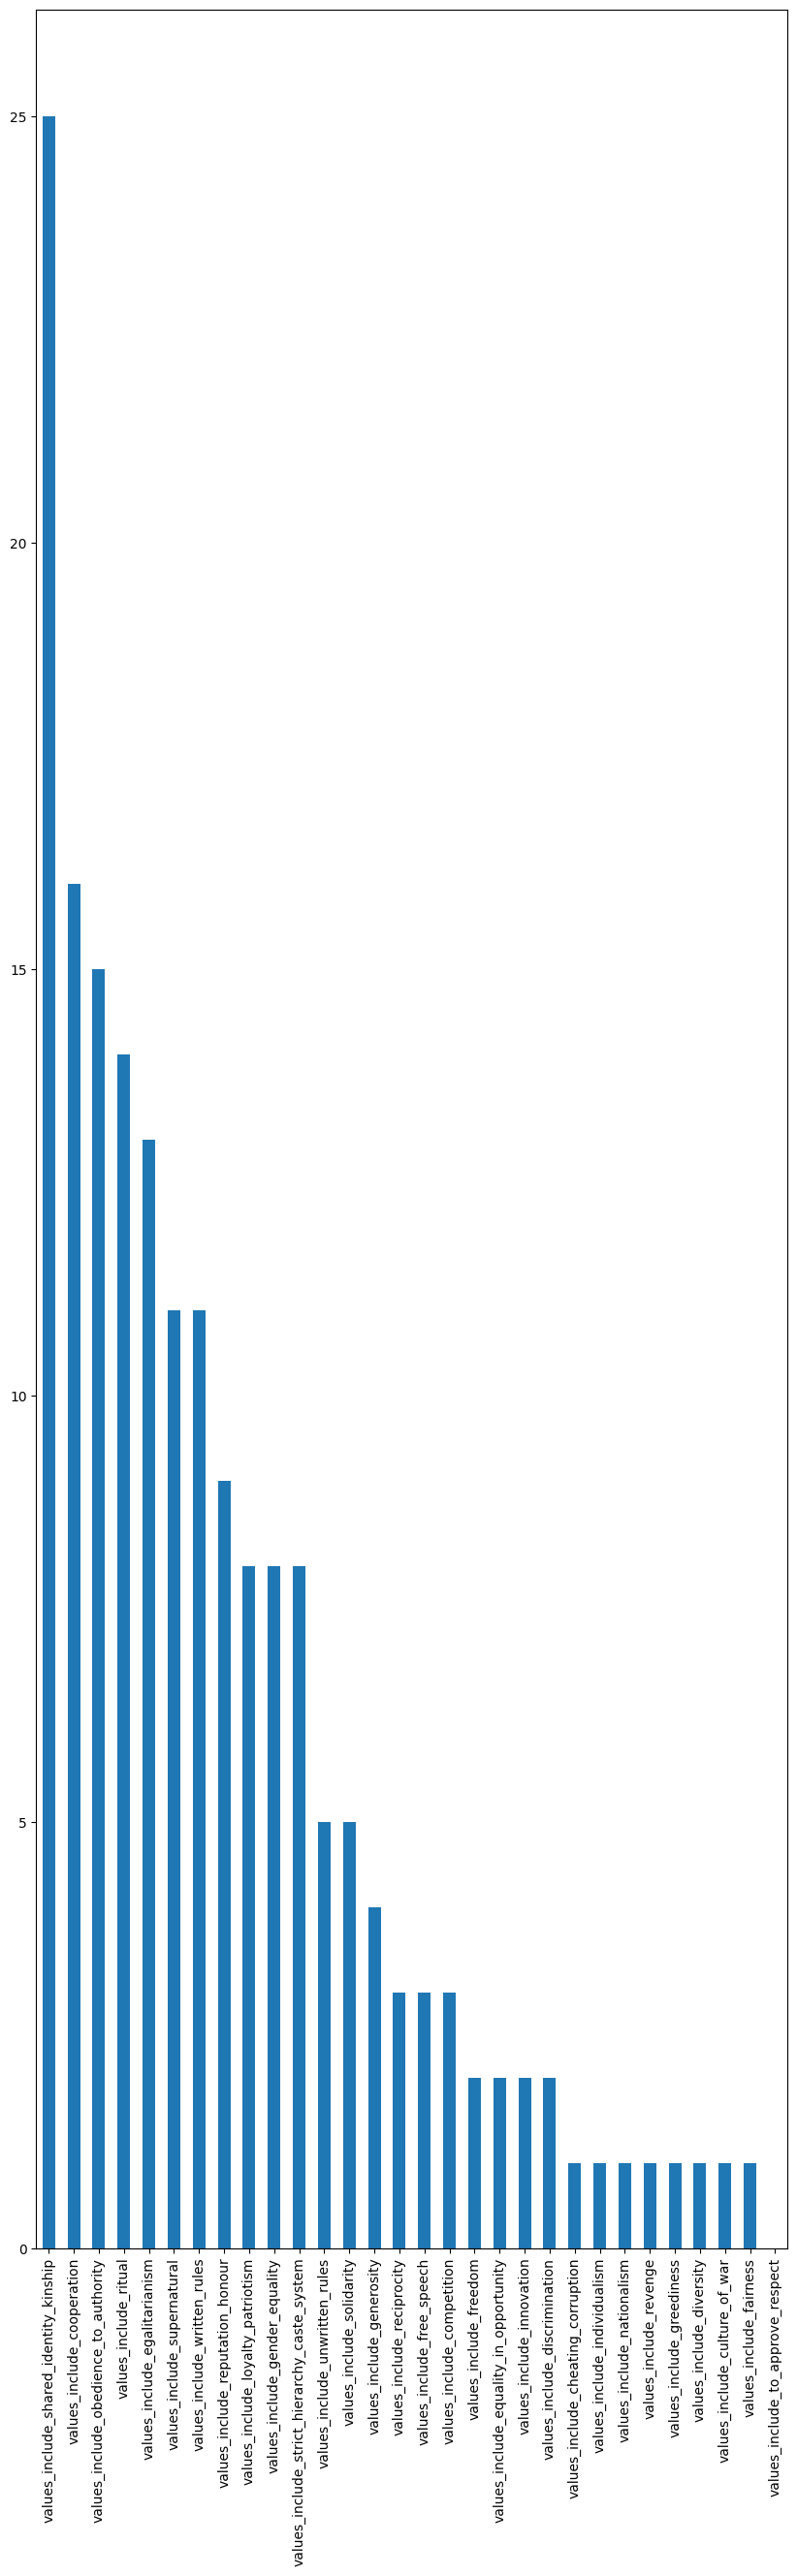

In [102]:
values_df.sum().sort_values(ascending=False).plot(kind='bar', figsize=(10,30))

Note:
- Mechanisms are not mutually exclusive! Many/most institutions involve multiple mechanisms.
- Values are also not mutually exclusive! Many/most institutions involve multiple values. 

### Size

In [15]:
gov_df['Size'].value_counts()

Size
10,001 - 100,000                  26
1,001 - 10,000                    12
100,001 - 1 million members        8
1 million - 10 million members     6
Unknown                            5
+10 million members                3
20 million - 30 million            1
100 - 1,000                        1
33,000                             1
20,000-30,000                      1
Name: count, dtype: int64

In [107]:
gov_df['Size']

0                     1,001 - 10,000
1        100,001 - 1 million members
2                   10,001 - 100,000
3                   10,001 - 100,000
4                            Unknown
5                     1,001 - 10,000
6        100,001 - 1 million members
7        100,001 - 1 million members
8                   10,001 - 100,000
9        100,001 - 1 million members
10                  10,001 - 100,000
11               +10 million members
12                           Unknown
13                  10,001 - 100,000
14                  10,001 - 100,000
15                  10,001 - 100,000
16                  10,001 - 100,000
17    1 million - 10 million members
18    1 million - 10 million members
19                    1,001 - 10,000
20                    1,001 - 10,000
21                  10,001 - 100,000
22                  10,001 - 100,000
23                  10,001 - 100,000
24                  10,001 - 100,000
25                  10,001 - 100,000
26                  10,001 - 100,000
2

In [108]:
"""
Replace sizes:

100 - 1,000
1,001 - 10,000
20,000-30,000                  -> 10,001 - 100,000
33,000                         -> 10,001 - 100,000 
10,001 - 100,000
100,001 - 1 million members    -> 100,001 - 1,000,000
1 million - 10 million members -> 100,000,001 - 10,000,000
+10 million members            -> 10,000,000+
20 million - 30 million        -> 10,000,000+
Unknown
"""

'\nReplace sizes:\n\n100 - 1,000\n1,001 - 10,000\n20,000-30,000                  -> 10,001 - 100,000\n33,000                         -> 10,001 - 100,000 \n10,001 - 100,000\n100,001 - 1 million members    -> 100,001 - 1,000,000\n1 million - 10 million members -> 100,000,001 - 10,000,000\n+10 million members            -> 10,000,000+\n20 million - 30 million        -> 10,000,000+\nUnknown\n'

In [109]:
# Replace size values
gov_df['Size'] = gov_df['Size'].replace(['20,000-30,000','33,000'], '10,001 - 100,000')

In [111]:
gov_df['Size'] = gov_df['Size'].replace(['100,001 - 1 million members'], '100,001 - 1,000,000')

In [113]:
gov_df['Size'] = gov_df['Size'].replace(['1 million - 10 million members'], '100,000,001 - 10,000,000')

In [114]:
gov_df['Size'] = gov_df['Size'].replace(['+10 million members','20 million - 30 million'], '10,000,000+')

In [115]:
gov_df['Size'].value_counts()

Size
10,001 - 100,000            28
1,001 - 10,000              12
100,001 - 1,000,000          8
100,000,001 - 10,000,000     6
Unknown                      5
10,000,000+                  4
100 - 1,000                  1
Name: count, dtype: int64

<Axes: xlabel='Size'>

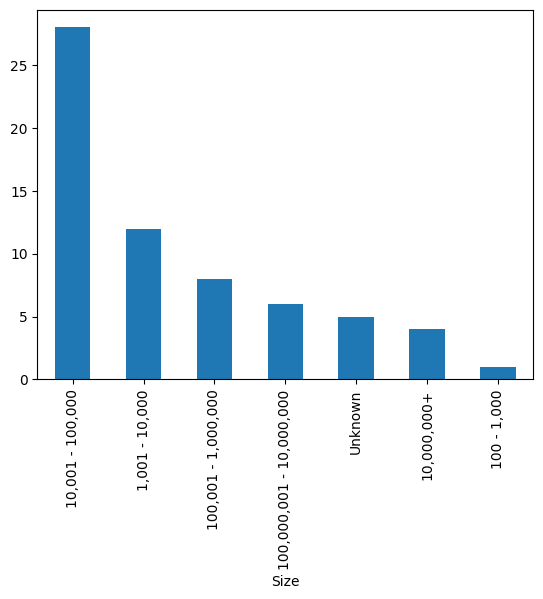

In [117]:
gov_df['Size'].value_counts().plot(kind='bar')

In [118]:
size_order = [
    '100 - 1,000',
    '1,001 - 10,000',
    '10,001 - 100,000',
    '100,001 - 1,000,000',
    '100,000,001 - 10,000,000',
    '10,000,000+',
    'Unknown',
]

Notes / TODO:
- x Consolidate population sizes

<Axes: xlabel='Size'>

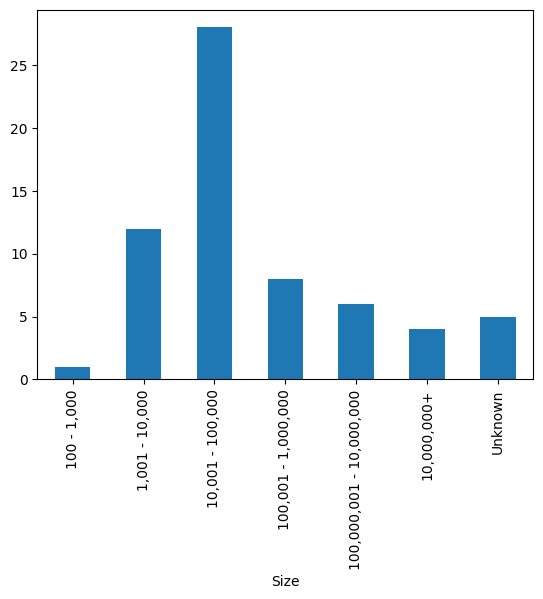

In [119]:
gov_df['Size'].value_counts().loc[size_order].plot.bar()

### Geography 

In [19]:
gov_df['Geography'].value_counts()

Geography
Europe South, Italy                    8
North America                          6
Europe West                            5
Middle East                            4
Europe East                            3
Asia Southeast                         3
Asia Southeast                         2
Central America, Mexico                2
Europe South, Greece                   2
Central America                        2
Asia Central                           1
Asia, Japan                            1
Asia, North-eastern India              1
Africa North, Algeria                  1
Africa South                           1
Asia, Southwestern China               1
Africa West, Niger Delta               1
South America, Brazil                  1
North America, Louisiana               1
Asia Southeast, Bali                   1
Asia, India                            1
Middle East MENA                       1
Oceania                                1
Asia, India (northeast)                1
Africa

<Axes: xlabel='Geography'>

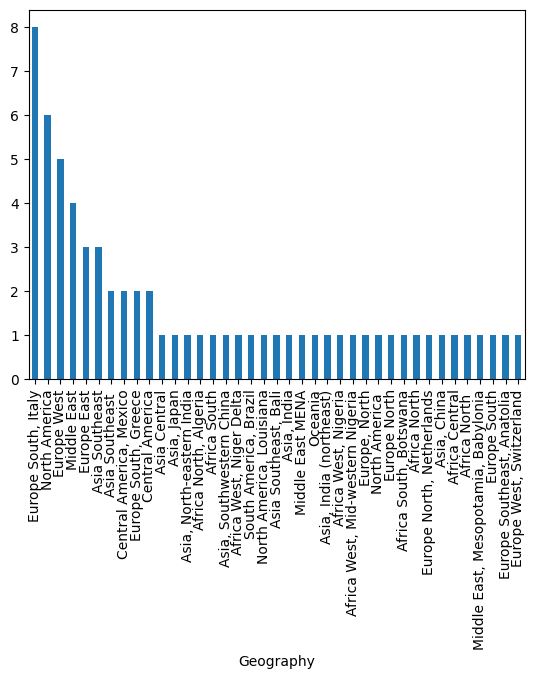

In [20]:
gov_df['Geography'].value_counts().plot(kind='bar')

In [21]:
"""
- Africa
- Europe
- Asia
- Middle East
- North America
- Central America
- South America
- Oceania
"""

'\n- Africa\n- Europe\n- Asia\n- Middle East\n- North America\n- Central America\n- South America\n- Oceania\n'

In [22]:
gov_df['Geography']

0                            Africa South
1                            Europe North
2                         Asia Southeast 
3                             Europe West
4                             Middle East
5              Europe Southeast, Anatolia
6                            Europe South
7                 Central America, Mexico
8     Middle East, Mesopotamia, Babylonia
9                           Africa North 
10                         Africa Central
11                            Asia, China
12                            Europe East
13                            Europe West
14                            Europe West
15              Europe North, Netherlands
16                            Middle East
17                           Africa North
18                            Europe West
19                    Europe South, Italy
20                 Africa South, Botswana
21                    Europe South, Italy
22                    Europe South, Italy
23                   Europe South,

In [23]:
# Create broader regions 
conditions = [
    (gov_df['Geography'].str.contains('Africa')),
    (gov_df['Geography'].str.contains('Europe')),
    (gov_df['Geography'].str.contains('Asia')),
    (gov_df['Geography'].str.contains('Middle East')),
    (gov_df['Geography'].str.contains('North America')),
    (gov_df['Geography'].str.contains('Central America')),
    (gov_df['Geography'].str.contains('South America')),
    (gov_df['Geography'].str.contains('Oceania'))
]

In [24]:
regions = ['Africa','Europe','Asia','Middle East','North America','Central America','South America','Oceania']

In [25]:
gov_df['Region'] = np.select(conditions, regions)

In [26]:
gov_df.head()

,Name,Institutions,Mechanism,Culture/Values/Norms,Notes,Time span,Geography,Size,Source,Metanotes,Heterogeneity,FC comments,expert check,mechanisms_include_dreaming,mechanisms_include_dual-sex_political_system,mechanisms_include_negotiation,mechanisms_include_secret_ballot,mechanisms_include_president_consul_chief_executive,mechanisms_include_induction_rite_ceremony,mechanisms_include_divine_right,mechanisms_include_council_local,mechanisms_include_rule_of_law,mechanisms_include_election,mechanisms_include_self-help,mechanisms_include_litigation,mechanisms_include_age_boundaries,mechanisms_include_vote_by_proxy,mechanisms_include_arbitration,mechanisms_include_co-optation,mechanisms_include_balance_of_power,mechanisms_include_monitoring,mechanisms_include_blood_relations,mechanisms_include_military_force,mechanisms_include_judicial_review,mechanisms_include_supermajority,mechanisms_include_petition,mechanisms_include_constitution,mechanisms_include_voting,mechanisms_include_power_fluidity,mechanisms_include_matrilineality,mechanisms_include_bureaucracy,mechanisms_include_jury_judge,mechanisms_include_leader_first_among_equals,mechanisms_include_open_political_unit,mechanisms_include_fines,mechanisms_include_handshake,mechanisms_include_assembly_central,mechanisms_include_reputational_risk,mechanisms_include_temporary_position_of_power_term_limits,mechanisms_include_turnover_rotation,mechanisms_include_lottery_random_selection,mechanisms_include_consensus,mechanisms_include_meritocracy,mechanisms_include_matriarchy,mechanisms_include_kingchief-as-figurehead,mechanisms_include_exit,mechanisms_include_gerontocracy,mechanisms_include_alliance,mechanisms_include_board_committee,mechanisms_include_quorum,mechanisms_include_civil_disobedience,mechanisms_include_assembly_local,mechanisms_include_criticism_mocking_joking,mechanisms_include_coalition,mechanisms_include_autocratic_leader_chief_bound,mechanisms_include_delegation,mechanisms_include_majority_voting,mechanisms_include_confederacy,mechanisms_include_enfranchisement,mechanisms_include_plurality_voting,mechanisms_include_forced_labour,mechanisms_include_heredity,mechanisms_include_suspension_expulsion_ostracism_proscription,mechanisms_include_consent,mechanisms_include_magistrate_official,mechanisms_include_seizing_of_property,mechanisms_include_checks_and_balances,mechanisms_include_corporal_punishment_violence_against_perpetrator,mechanisms_include_scrutiny_of_officials,mechanisms_include_agenda_setting,mechanisms_include_consultation,mechanisms_include_tribunal_court_,mechanisms_include_autocratic_leader_unbound,mechanisms_include_screening_process,mechanisms_include_ratification_acclamation_only,mechanisms_include_mandate,mechanisms_include_public_meetings,mechanisms_include_mediation,mechanisms_include_council_central_,mechanisms_include_oath,mechanisms_include_police,mechanisms_include_assembly_elite,mechanisms_include_appeal,mechanisms_include_payment_for_occupying_office,mechanisms_include_life_appointment,mechanisms_include_property_requirement,mechanisms_include_veto,mechanisms_include_lobbying,mechanisms_include_capital_punishment,mechanisms_include_deliberation,mechanisms_include_graduated_sanctions,mechanisms_include_group_voting,mechanisms_include_remunerated_position,mechanisms_include_representation,mechanisms_include_destruction_of_property,mechanisms_include_unanimity,mechanisms_include_vote_by_show_of_hands,mechanisms_include_popularity_,mechanisms_include_word_of_mouth,mechanisms_include_paying_damages_compensation,mechanisms_include_patronage_for_office,mechanisms_include_frequent_and_or_regular_meetings,values_include_nationalism,values_include_diversity,values_include_supernatural,values_include_obedience_to_authority,values_include_competition,values_include_cooperation,values_include_unwritten_rules,values_include_discrimination,values_include_gender_equality,values_include_culture_of_war,values_include_egalitarianism,values_include_to_approve_respect,

In [27]:
gov_df['Region'].value_counts()

Region
Europe             24
Asia               13
Africa              9
North America       8
Middle East         6
Central America     4
South America       1
Oceania             1
Name: count, dtype: int64

<Axes: xlabel='Region'>

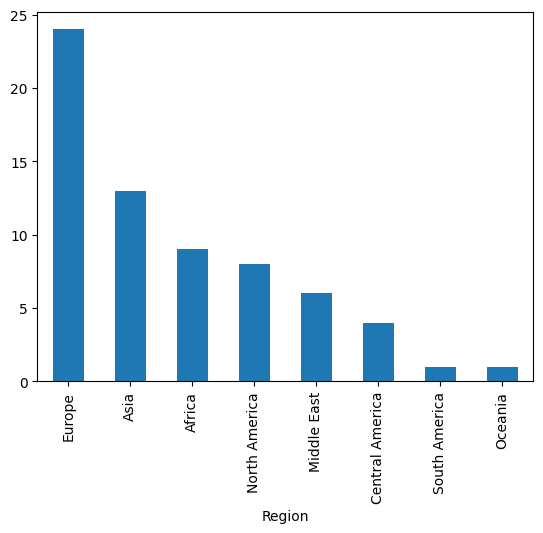

In [28]:
gov_df['Region'].value_counts().plot(kind='bar')

Notes:
- Overrepresentation of European communities
- Need more representation of Oceania and Pacific Islanders, South America, Central America! 

### Map test

Notes / TODO:
- add geometry from worldmap to gov_worldmap

### Prep world map data to match the regions we have 

In [32]:
worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

/var/folders/v7/8x_7ty4j3m76hgg7tncks_kc0000gn/T/ipykernel_86601/3744710904.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  worldmap = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


In [46]:
worldmap

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,8.899530e+05,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,5.800546e+07,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,6.032530e+05,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,3.758926e+07,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,3.282395e+08,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
5,1.851393e+07,Asia,Kazakhstan,KAZ,181665,"POLYGON ((87.35997 49.21498, 86.59878 48.54918..."
6,3.358065e+07,Asia,Uzbekistan,UZB,57921,"POLYGON ((55.96819 41.30864, 55.92892 44.99586..."
7,8.776109e+06,Oceania,Papua New Guinea,PNG,24829,"MULTIPOLYGON (((141.00021 -2.60015, 142.73525 ..."
8,2.706256e+08,Asia,Indonesia,IDN,1119190,"MULTIPOLYGON (((141.00021 -2.60015, 141.01706 ..."
9,4.493871e+07,South America,Argentina,ARG,445445,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000..."


In [134]:
sorted(list(worldmap['name']))

['Afghanistan',
 'Albania',
 'Algeria',
 'Angola',
 'Antarctica',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bangladesh',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herz.',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Rep.',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Congo',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 "Côte d'Ivoire",
 'Dem. Rep. Congo',
 'Denmark',
 'Djibouti',
 'Dominican Rep.',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Eq. Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Falkland Is.',
 'Fiji',
 'Finland',
 'Fr. S. Antarctic Lands',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Greenland',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',
 'Haiti',
 'Honduras',
 'Hungary',
 'Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy

In [139]:
central_america_countries = [
    'Belize',
    'Costa Rica',
    'El Salvador',
    'Guatemala',
    'Honduras',
    'Nicaragua',
    'Panama'
]

In [140]:
middle_east_countries = [
    'Cyprus',
    'Egypt',
    'Iran',
    'Iraq',
    'Israel',
    'Jordan',
    'Kuwait',
    'Lebanon',
    'Oman',
    'Palestine',
    'Qatar',
    'Saudi Arabia',
    'Syria',
    'Turkey',
    'United Arab Emirates',
    'Yemen'
]

In [146]:
worldmap['name'].isin(central_america_countries)

0      False
1      False
2      False
3      False
4      False
5      False
6      False
7      False
8      False
9      False
10     False
11     False
12     False
13     False
14     False
15     False
16     False
17     False
18     False
19     False
20     False
21     False
22     False
23     False
24     False
25     False
26     False
27     False
28     False
29     False
30     False
31     False
32     False
33      True
34      True
35      True
36      True
37      True
38      True
39      True
40     False
41     False
42     False
43     False
44     False
45     False
46     False
47     False
48     False
49     False
50     False
51     False
52     False
53     False
54     False
55     False
56     False
57     False
58     False
59     False
60     False
61     False
62     False
63     False
64     False
65     False
66     False
67     False
68     False
69     False
70     False
71     False
72     False
73     False
74     False
75     False
76     False

In [150]:
# Add region for Central America
worldmap.loc[(worldmap['name'].isin(central_america_countries)), 'continent'] = 'Central America'

In [151]:
worldmap.loc[(worldmap['continent'] == 'Central America')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
33,4246439.0,Central America,Panama,PAN,66800,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429..."
34,5047561.0,Central America,Costa Rica,CRI,61801,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681..."
35,6545502.0,Central America,Nicaragua,NIC,12520,"POLYGON ((-83.65561 10.93876, -83.89505 10.726..."
36,9746117.0,Central America,Honduras,HND,25095,"POLYGON ((-83.14722 14.99583, -83.48999 15.016..."
37,6453553.0,Central America,El Salvador,SLV,27022,"POLYGON ((-89.35333 14.42413, -89.05851 14.340..."
38,16604026.0,Central America,Guatemala,GTM,76710,"POLYGON ((-92.22775 14.53883, -92.20323 14.830..."
39,390353.0,Central America,Belize,BLZ,1879,"POLYGON ((-89.14308 17.80832, -89.15091 17.955..."


In [152]:
# Add region for Middle East
worldmap.loc[(worldmap['name'].isin(middle_east_countries)), 'continent'] = 'Middle East'

In [153]:
worldmap.loc[(worldmap['continent'] == 'Middle East')]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
76,9053300.0,Middle East,Israel,ISR,394652,"POLYGON ((35.71992 32.70919, 35.54567 32.39399..."
77,6855713.0,Middle East,Lebanon,LBN,51991,"POLYGON ((35.82110 33.27743, 35.55280 33.26427..."
79,4685306.0,Middle East,Palestine,PSE,16276,"POLYGON ((35.39756 31.48909, 34.92741 31.35344..."
83,10101694.0,Middle East,Jordan,JOR,44502,"POLYGON ((35.54567 32.39399, 35.71992 32.70919..."
84,9770529.0,Middle East,United Arab Emirates,ARE,421142,"POLYGON ((51.57952 24.24550, 51.75744 24.29407..."
85,2832067.0,Middle East,Qatar,QAT,175837,"POLYGON ((50.81011 24.75474, 50.74391 25.48242..."
86,4207083.0,Middle East,Kuwait,KWT,134628,"POLYGON ((47.97452 29.97582, 48.18319 29.53448..."
87,39309783.0,Middle East,Iraq,IRQ,234094,"POLYGON ((39.19547 32.16101, 38.79234 33.37869..."
88,4974986.0,Middle East,Oman,OMN,76331,"MULTIPOLYGON (((55.20834 22.70833, 55.23449 23..."
107,82913906.0,Middle East,Iran,IRN,453996,"POLYGON ((48.56797 29.92678, 48.01457 30.45246..."


In [154]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

#### Merge regions on world map

In [295]:
region_map = gpd.GeoDataFrame(columns=['Region', 'geometry'])

In [296]:
region_map

,Region,geometry


In [297]:
worldmap.head()

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [298]:
test_map = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [299]:
print(test_map)

POLYGON ((-77.24256649444008 7.935278225125444, -77.43110795765699 7.638061224798734, -77.7534138658614 7.709839789252143, -77.88157141794525 7.223771267114785, -78.21493608266012 7.512254950384161, -78.42916073272607 8.052041123888927, -78.18209570993864 8.319182440621773, -78.4354652574657 8.38770538984079, -78.62212053090394 8.718124497915028, -79.12030717641375 8.996092027213024, -79.55787736684519 8.932374986197146, -79.76057817251005 8.5845150822244, -80.16448116730334 8.333315944853595, -80.38265906443962 8.298408514840432, -80.4806892564973 8.09030752200107, -80.00368994822716 7.547524115423372, -80.276670701809 7.419754136581716, -80.42115800649708 7.271571966984765, -80.8864009264208 7.220541490096537, -81.05954281281473 7.817921047390597, -81.18971574575795 7.64790558515034, -81.51951473664468 7.706610012233909, -81.72131120474447 8.108962714058435, -82.13144120962892 8.175392767769637, -82.39093441438257 8.29236237226229, -82.82008134635042 8.290863755725823, -82.8509580146

In [300]:
regions_list = list(gov_df['Region'].unique())

In [301]:
regions_list

['Africa',
 'Europe',
 'Asia',
 'Middle East',
 'Central America',
 'North America',
 'South America',
 'Oceania']

In [302]:
region_map['Region'] = regions_list

In [303]:
region_map

,Region,geometry
0,Africa,None
1,Europe,None
2,Asia,None
3,Middle East,None
4,Central America,None
5,North America,None
6,South America,None
7,Oceania,None


In [304]:
worldmap['continent'].value_counts()

continent
Africa                     50
Europe                     39
Asia                       32
Middle East                16
South America              13
North America              11
Oceania                     7
Central America             7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

In [305]:
region_map['geometry'].loc[region_map['Region'] == 'Africa'] = worldmap.loc[(worldmap['continent'] == 'Africa')].unary_union

In [306]:
region_map['geometry'].loc[region_map['Region'] == 'Europe'] = worldmap.loc[(worldmap['continent'] == 'Europe')].unary_union

In [307]:
region_map['geometry'].loc[region_map['Region'] == 'Asia'] = worldmap.loc[(worldmap['continent'] == 'Asia')].unary_union

In [308]:
region_map['geometry'].loc[region_map['Region'] == 'Middle East'] = worldmap.loc[(worldmap['continent'] == 'Middle East')].unary_union

In [309]:
region_map['geometry'].loc[region_map['Region'] == 'North America'] = worldmap.loc[(worldmap['continent'] == 'North America')].unary_union

In [310]:
region_map['geometry'].loc[region_map['Region'] == 'Central America'] = worldmap.loc[(worldmap['continent'] == 'Central America')].unary_union

In [311]:
region_map['geometry'].loc[region_map['Region'] == 'South America'] = worldmap.loc[(worldmap['continent'] == 'South America')].unary_union

In [312]:
region_map['geometry'].loc[region_map['Region'] == 'Oceania'] = worldmap.loc[(worldmap['continent'] == 'Oceania')].unary_union

In [313]:
region_map

,Region,geometry
0,Africa,"MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ..."
1,Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ..."
2,Asia,"MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852..."
3,Middle East,"MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ..."
4,Central America,"POLYGON ((-77.243 7.935, -77.431 7.638, -77.75..."
5,North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0..."
6,South America,"MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4..."
7,Oceania,"MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9..."


In [323]:
region_counts = gov_df['Region'].value_counts().rename_axis('Region').reset_index(name='Count')

In [324]:
region_counts

,Region,Count
0,Europe,24
1,Asia,13
2,Africa,9
3,North America,8
4,Middle East,6
5,Central America,4
6,South America,1
7,Oceania,1


In [325]:
merged_regions = pd.merge(region_map, region_counts, on='Region')

In [326]:
merged_regions

,Region,geometry,Count
0,Africa,"MULTIPOLYGON (((-11.439 6.786, -11.708 6.860, ...",9
1,Europe,"MULTIPOLYGON (((-53.555 2.335, -53.779 2.377, ...",24
2,Asia,"MULTIPOLYGON (((105.857 -4.306, 105.818 -5.852...",13
3,Middle East,"MULTIPOLYGON (((25.000 25.682, 25.000 29.239, ...",6
4,Central America,"POLYGON ((-77.243 7.935, -77.431 7.638, -77.75...",4
5,North America,"MULTIPOLYGON (((-155.222 19.240, -155.542 19.0...",8
6,South America,"MULTIPOLYGON (((-68.640 -55.580, -69.232 -55.4...",1
7,Oceania,"MULTIPOLYGON (((147.914 -43.212, 147.565 -42.9...",1


<Axes: >

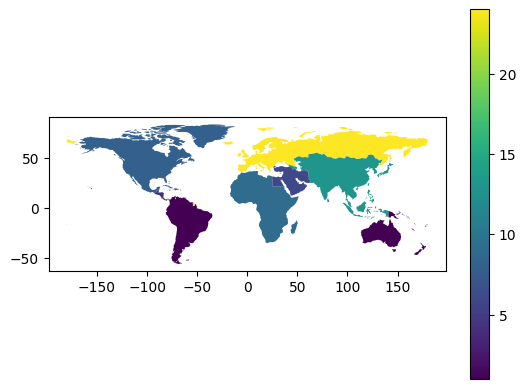

In [333]:
merged_regions.plot(column='Count', legend=True)

0            Annotation(17.7812, 5.71672, 'Africa\n9')
1           Annotation(78.6181, 60.0009, 'Europe\n24')
2             Annotation(93.0712, 32.9649, 'Asia\n13')
3       Annotation(44.0087, 28.8033, 'Middle East\n6')
4    Annotation(-86.0219, 13.199, 'Central America\...
5    Annotation(-92.2527, 57.1283, 'North America\n8')
6    Annotation(-60.8785, -15.4799, 'South America\...
7          Annotation(136.766, -25.3188, 'Oceania\n1')
dtype: object

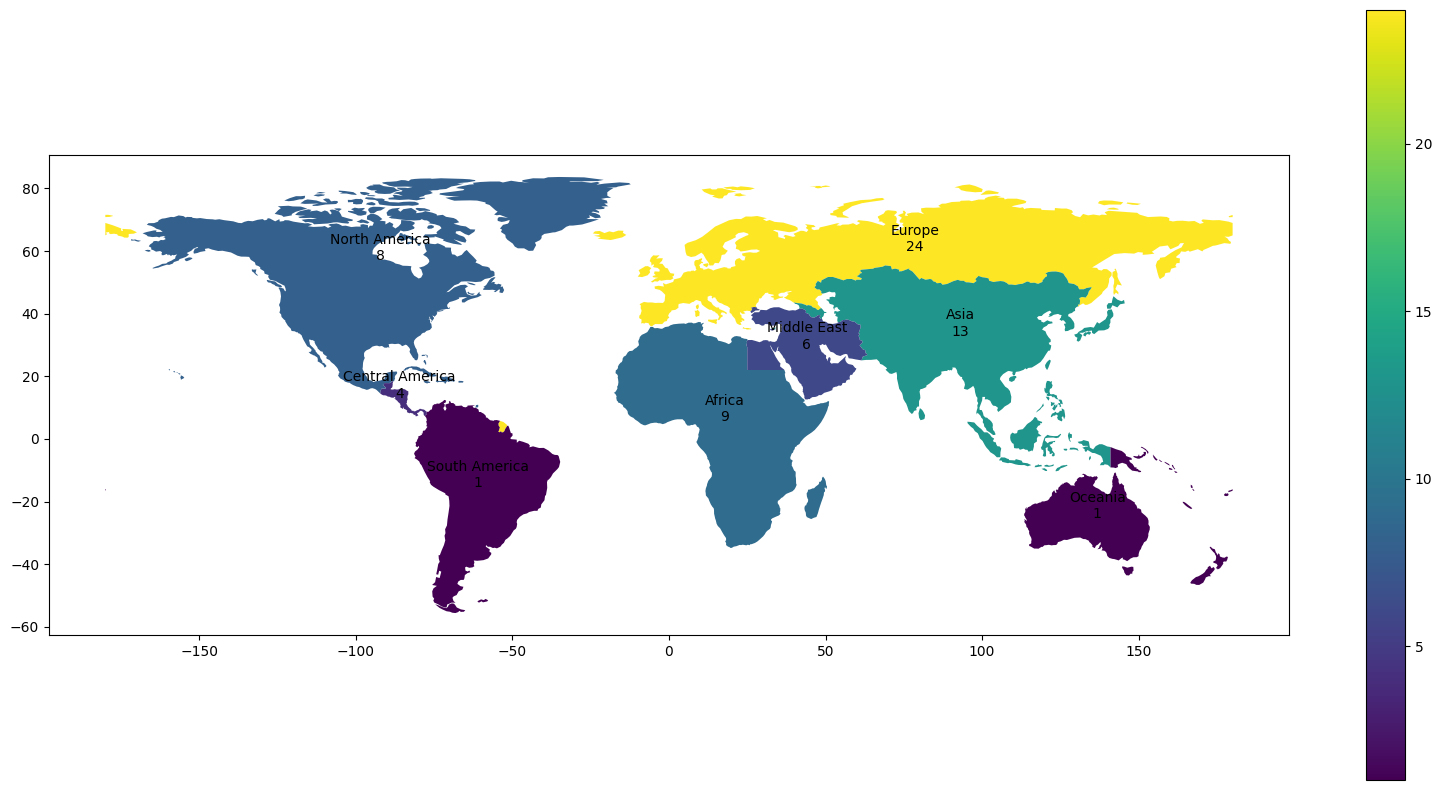

In [348]:
ax = merged_regions.plot(
    column='Count', 
    legend=True, 
    figsize=(20,10)
)

# Annotate
merged_regions.apply(lambda x: ax.annotate(text=x['Region'] + '\n' + str(x['Count']), xy=x.geometry.centroid.coords[0], ha='center'), axis=1)

## Time Span

Note:
- Change Time span to "Time span: Start" and "Time span: Stop"

In [29]:
gov_df['Time span'].value_counts()

Time span
18th-19th century AD                                                                                                                                                    4
19th century AD                                                                                                                                                         3
5th -1st century BC\n(480-27 BC)                                                                                                                                        2
20th century - Present\n(dates are arbitrary)                                                                                                                           1
13th - 18th century AD                                                                                                                                                  1
17-18th century AD                                                                                                                          

<Axes: xlabel='Time span'>

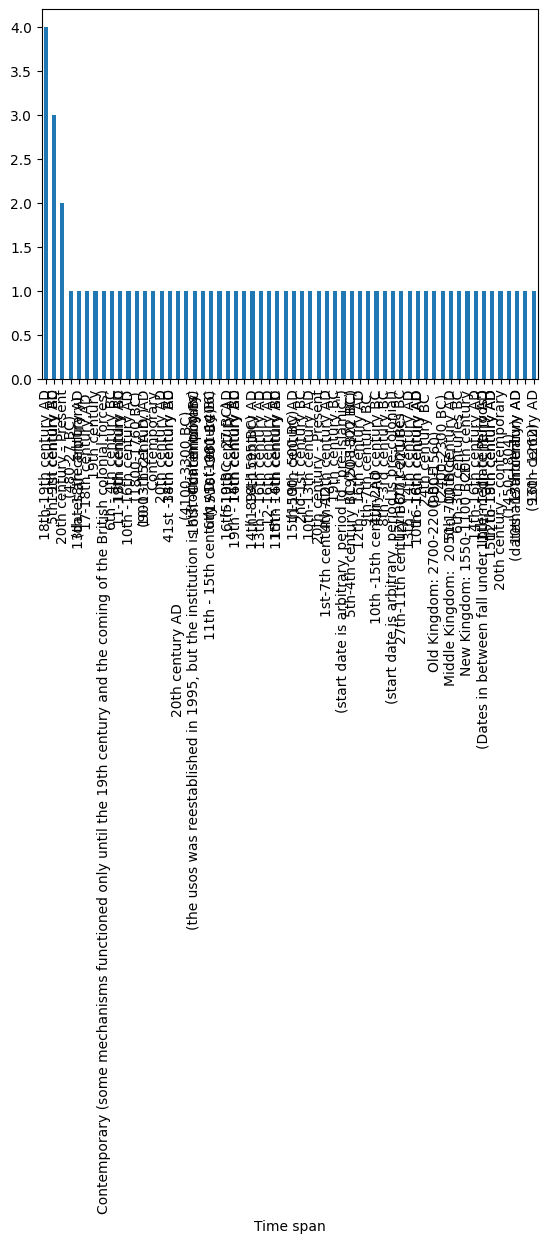

In [30]:
gov_df['Time span'].value_counts().plot(kind='bar')

In [31]:
"""
Notes: TODO
- Restructure time span data to more easily plot on a timeline
"""

'\nNotes: TODO\n- Restructure time span data to more easily plot on a timeline\n'

/ Notes / TODO:
- x Mechanisms, Institution, Culture/Norms etc. 
- Plot time span 
- Cluster communities by similarity (PCA) - can check w Seth
- CGI-specific analyses 

/
- Address remaining questions in doc: https://docs.google.com/document/d/1f1Qa25OGWWrvK5xrZjuLeqYn4WkgnyUH/edit
- CGIs: 
  - what do CGIs look like? 
  - How are they connected with other institutions? 
  - How many cgis per community, on average? 
  - how many non cgis, on average? How many institutions per community, on average? 
  - Does the variation interact with size, time or space?
  - Identify patterns in terms of:
      - Functions of the CGI
      - Level of jurisdiction (local/central) and membership (elite/commoners)
      - Within a type of CGI (say, assembly), what are the main sources of variation in terms of function and membership?
      - Possible interactions with size
  
- Mechanisms:
  - How many mechanisms in CGIs, on average? 
  - how many mechanisms in the community? 
  - What mechanisms prevail? 
  - What mechanisms prevail in CGIs compared to non-CGIs?
  - Does the variation interact with size, time or space?
  
- Region:
  - can we identify any regional characteristics? 
  - We should also provide a simple breakdown of each of the three features (time, place, size). 
  - How many communities in each?

/
- CGI network structures?

### TODO 

1. Finish descriptive analysis 
- CGI analysis -- histogram for mechanisms
- Timeline plotting 
- x Geography mapping
- x Clean up + reformat size


2. Mechanisms analysis 
- Mechanisms x geography, mechanisms x time, mechanisms x size


3. CGI Analysis 
- CGI-mechanism histogram 
- CGI Mechanisms x geography, mechanisms x time, mechanisms x size
- Correlation matrices for mechanisms and CGI mechanisms


4. Similarity clustering 
- Similarity clustering for Communities 

## TODO: Clustering communities by similarity

## Analyses: Collective Governance Institutions

In [103]:
# TODO: Move to separate notebook for Institutions analysis 